# Exercise 4

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from matplotlib import rc
rc('animation', html='jshtml')

Create an array of random cells (1=live,0=dead) to initiate the grid

In [5]:
game_grid = np.random.randint(2, size=(200, 200), dtype=np.uint8)
print(game_grid)

[[1 1 0 ..., 1 1 0]
 [1 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 1 1]
 ..., 
 [1 1 0 ..., 1 0 0]
 [1 0 0 ..., 1 1 1]
 [0 1 1 ..., 1 1 0]]


Implement the rules of the game

In [3]:
def game_of_life(grid):
    """
    Implements the rule of the Game of Life given an initial configuration.
    
    initial_grid - a square grid of 1's and 0's
    """

    # create a grid on which the rules will be imposed
    # initiate its state to 0 everywhere

    rows, cols = grid.shape
    
    implemented_grid = np.zeros([rows,cols])

    # implement the rule
    for i in range(rows):
        for j in range(cols):

            # get the state of the central cell in a square
            state = grid[i,j] 

            # get the state of the cells in the 3x3 neighbourhood excluding the central cell
            live_neighbours = (grid[i, (j-1)%cols] + grid[i, (j+1)%cols] + 
               grid[(i-1)%rows, j] + grid[(i+1)%rows, j] + 
               grid[(i-1)%rows, (j-1)%cols] + grid[(i-1)%rows, (j+1)%cols] + 
               grid[(i+1)%rows, (j-1)%cols] + grid[(i+1)%rows, (j+1)%cols])

            if state:
                if live_neighbours == 2 or live_neighbours == 3:
                    implemented_grid[i, j] = 1
            else:
                if live_neighbours == 3:
                    implemented_grid[i, j] = 1

    return implemented_grid

Create a visualisation 

In [6]:
def visualise_gol(grid):
    plt.clf()
    plt.axis("off")
    plt.imshow(grid, cmap='binary')
    plt.show()

Test using the test object

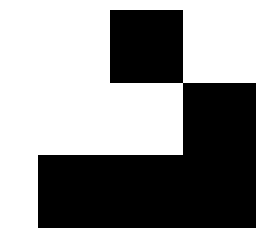

In [7]:
test_object = np.array([[0, 1, 0], [0, 0, 1],[1, 1, 1]])

visualise_gol(test_object)

In [119]:
def animation_gol(grid, seed_array, seed_position, quality=200, cmap="Purples", n_generations=50, interval=300):
    
    # Initialise the grid and seed
    x_start, y_start = seed_position[0], seed_position[1]
    x_end, y_end = x_start + seed_array.shape[0], y_start + seed_array.shape[1]
    grid[x_start:x_end, y_start:y_end] = seed_array

    # Animate the game
    fig = plt.figure(dpi=quality)
    plt.axis("off")
    ims = []
    for i in range(n_generations):
        ims.append((plt.imshow(grid, cmap=cmap),))
        grid = game_of_life(grid)
    im_ani = animation.ArtistAnimation(fig, ims, interval=interval, repeat_delay=3000, blit=True)

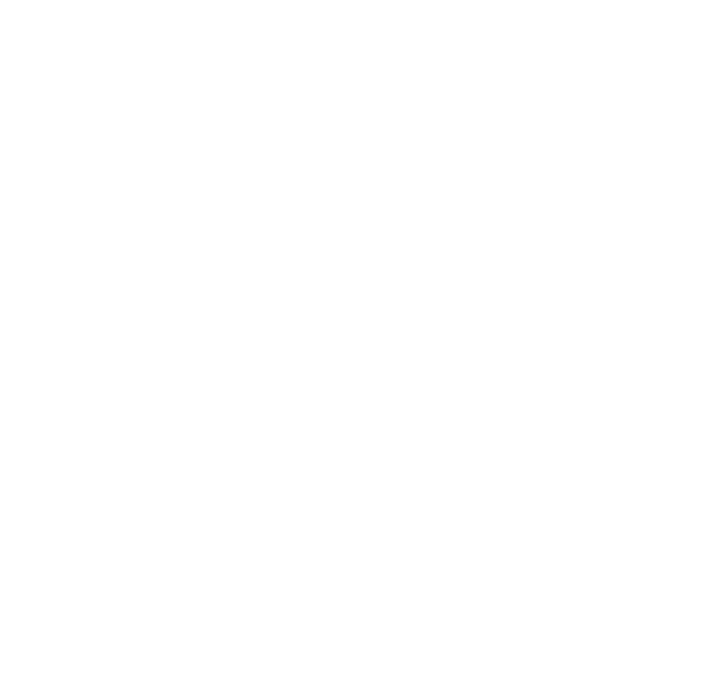

In [120]:
animation_gol(game_grid,test_object,(1,1))